## Data Preparation & Modelling

In [75]:
# Now, Let's prepare the data for ML algorithms

In [76]:
# Importing the necessary libraries

import os
import numpy as np
import pandas as pd

In [77]:
# To display all the columns in the dataframe

pd.set_option('display.max_columns', None)

In [78]:
# To hide the warnings

import warnings

warnings.filterwarnings('ignore')

In [79]:
# Reading the train and test sets (These were split before EDA)

def read_data(filename):
    return pd.read_csv(os.path.join('dataset', filename), index_col='index').rename_axis(None)

In [80]:
df_train = read_data('df_train.csv')
df_test = read_data('df_test.csv')
data = read_data('data.csv')

In [81]:
print(df_train.shape)
print(df_test.shape)
print(data.shape)

(1176, 35)
(294, 35)
(1176, 45)


In [82]:
# Encoding the target variable in both train and test set

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train['Attrition'] = le.fit_transform(df_train['Attrition'])

df_test['Attrition'] = le.transform(df_test['Attrition'])

In [83]:
# Separating X and y i.e. the independent tariables and the target variable

employees = df_train.drop('Attrition', axis=1)
employees_labels = df_train['Attrition'].copy()

employees_test = df_test.drop('Attrition', axis=1)
employees_test_labels = df_test['Attrition'].copy()

In [84]:
print(employees.shape, employees_labels.shape)
print(employees_test.shape, employees_test_labels.shape)

(1176, 34) (1176,)
(294, 34) (294,)


In [85]:
# Data Cleaning 
    # 1. Remove unnecessary attributes
    # 2. Handle missing values if any

In [86]:
# 1. Dropping unnecessary variables from both train and test sets

unnecessary_vars = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

employees = employees.drop(unnecessary_vars, axis=1)
employees_test = employees_test.drop(unnecessary_vars, axis=1)

In [87]:
# 2. Checking if there are any missing values

employees.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [88]:
employees_test.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [89]:
# There aren't any missing values in any of the variables

In [90]:
# Handling numeric variables

employees_num = employees.select_dtypes(exclude='object')

employees_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [91]:
# Let's create a custom class to add the derived attribute 'MonthlRateToIncome_Diff'

from sklearn.base import BaseEstimator, TransformerMixin

monthly_rate_idx, monthly_income_idx = 16, 15

class AddDerivedAttributes(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        monthly_rate_to_income_diff = X[:, monthly_rate_idx] - X[:, monthly_income_idx]
        return np.c_[X, monthly_rate_to_income_diff]

In [92]:
# Handling Categorical Attributes

employees_cat = employees.select_dtypes(include='object')

employees_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
941,Travel_Rarely,Research & Development,Technical Degree,Female,Laboratory Technician,Married,No
865,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Divorced,No
18,Travel_Rarely,Sales,Life Sciences,Female,Manager,Married,No
786,Non-Travel,Research & Development,Life Sciences,Male,Laboratory Technician,Married,No
416,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Married,Yes
...,...,...,...,...,...,...,...
1332,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Single,Yes
159,Travel_Frequently,Sales,Marketing,Female,Sales Representative,Married,No
318,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Single,Yes
1286,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,No


In [93]:
# Using one hot encoding technique to encode all the categorical variables

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

employees_cat_1hot = ohe.fit_transform(employees_cat)

In [94]:
len(employees_cat_1hot.toarray()[0])

28

In [95]:
# Building the pipeline for both numeric and categorical attributes

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attrs = list(employees_num.columns)
cat_attrs = list(employees_cat.columns)

# Pipeline step to add the derived attribute MonthlyRateToIncomeDiff
add_derived_attributes_pipeline = Pipeline([
    ('attribute_adder', AddDerivedAttributes())
])

# Pipeline to scale all the numeric attributes using standard scaler and encode all the categorical attributes using 
# one-hot-encoding
transform_pipeline = ColumnTransformer([
    ('scaling', StandardScaler(), make_column_selector(dtype_include=np.number)),
    ('one_hot_encoding', OneHotEncoder(), make_column_selector(dtype_include=object))
])

# Full Pipeline combining above two
full_pipeline = Pipeline([
    ('transform', transform_pipeline),
    ('add_derived_attributes', add_derived_attributes_pipeline),
])

In [96]:
employees_prepared = full_pipeline.fit_transform(employees)

In [97]:
employees_test_prepared = full_pipeline.transform(employees_test)

# 

## Modelling

### 1a. Logistic Regression

In [98]:
# Let's start first by building a Logistic Regression Model

from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(random_state=42)

log_reg_clf.fit(employees_prepared, employees_labels)

LogisticRegression(random_state=42)

In [99]:
# Looking at the accuracy scores that the logistic regression model can achieve on our data

from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_score(estimator=log_reg_clf, X=employees_prepared, y=employees_labels, cv=4, scoring='accuracy')

array([0.85034014, 0.87755102, 0.88435374, 0.86054422])

In [100]:
# This shows that we can achieve minimum 85% accuracy using logistc regression model.

In [101]:
# We do not evaluate our model using accuracy. We need to look at the confusion matrix and check the precision and recall scores
# For that let's first make the predictions

y_train_pred_log_reg = cross_val_predict(estimator=log_reg_clf, X=employees_prepared, y=employees_labels, cv=4, 
                                         method='predict')

y_train_pred_log_reg

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, precision_score, recall_score

confusion_matrix(y_true=employees_labels, y_pred=y_train_pred_log_reg)

array([[949,  37],
       [118,  72]], dtype=int64)

In [103]:
# Precision and Recall scores

print(f'Precision: {precision_score(y_true=employees_labels, y_pred=y_train_pred_log_reg)}')
print(f'Recall: {recall_score(y_true=employees_labels, y_pred=y_train_pred_log_reg)}')

Precision: 0.6605504587155964
Recall: 0.37894736842105264


In [104]:
# Precision and Recall are not as good as accuracy

In [105]:
# Let's look at the ROC curve and AUC score. For this we need y_score which is the prediction probabilities

y_probas_log_reg = cross_val_predict(estimator=log_reg_clf, X=employees_prepared, y=employees_labels, cv=4, 
                                         method='predict_proba')

y_probas_log_reg

array([[0.79863276, 0.20136724],
       [0.9037121 , 0.0962879 ],
       [0.99556275, 0.00443725],
       ...,
       [0.56742186, 0.43257814],
       [0.92631624, 0.07368376],
       [0.51975418, 0.48024582]])

In [106]:
y_scores = y_probas_log_reg[:, 1]

y_scores

array([0.20136724, 0.0962879 , 0.00443725, ..., 0.43257814, 0.07368376,
       0.48024582])

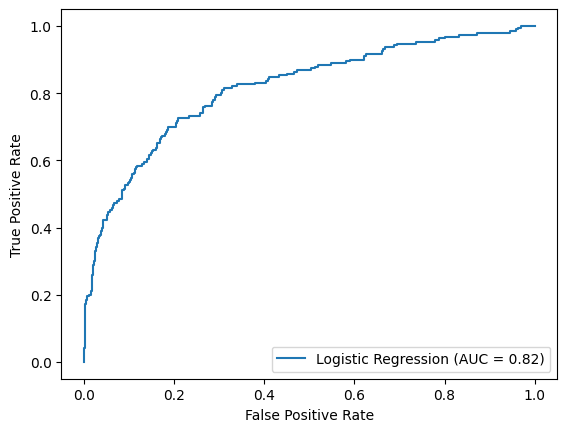

In [107]:
# Let's look at the ROC curve and AUC score now

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_true=employees_labels, y_score=y_scores)

roc_auc_log_reg = roc_auc_score(y_true=employees_labels, y_score=y_scores)

display_roc_log_reg = RocCurveDisplay(fpr=fpr_log_reg, 
                                      tpr=tpr_log_reg, 
                                      roc_auc=roc_auc_log_reg, 
                                      estimator_name='Logistic Regression')

display_roc_log_reg.plot()
plt.show()

In [108]:
# The Logistic Regression model has returned an AUC of 82%
# Accuracy: ~86%
# Precision: 66%
# Recall: 38%
# AUC: 82%

In [109]:
# Model's performance is very poor in terms of precision and recall.

# To improve this there are 2 ways,
## 1. Hyperparameter tuning using GridSearchCV
## 2. Adjustung the thresholds and improving the Precision/Recall

In [110]:
## First, Let's plot the precision recall vs thresholds curve and see if the thresholds can be adjusted to make these metrics
## better

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true=employees_labels, probas_pred=y_scores)

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.xlabel('Threshold')
    plt.title('Precision and Recall vs Thresholds')
    plt.legend(loc='best')

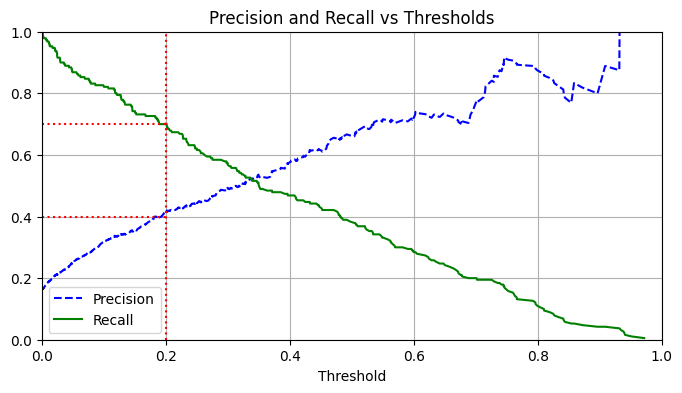

In [111]:
plt.figure(figsize=(8,4))
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.plot([0.2, 0.2], [0, 1], 'r:')
plt.plot([0, 0.2], [0.7, 0.7], 'r:')
plt.plot([0, 0.2], [0.4, 0.4], 'r:')
plt.show()

In [112]:
# From this plot we can see that,
## At threshold 0.2 we can get ~70% Recall and ~40% Precision
## At threshold 0.1 we can get ~82% Recall and ~30% Precision

In [113]:
# If required we can modify the thresholds and achieve the above numbers. But, Let's try our next approach which is
# Hyperparaeter tuning and see if it improves

In [114]:
# Hyperparameter tuning Logistic Regression model

from sklearn.model_selection import GridSearchCV, StratifiedKFold

model = LogisticRegression(random_state=42)

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l2']
}

skf = StratifiedKFold(n_splits=5)

log_reg_cv = GridSearchCV(estimator=model, 
                          param_grid=param_grid, 
                          cv=skf, 
                          scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
                          refit='recall',
                          verbose=True,
                          n_jobs=-1)

log_reg_cv.fit(employees_prepared, employees_labels)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='recall',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
             verbose=True)

In [115]:
log_reg_cv.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [116]:
pd.DataFrame(log_reg_cv.cv_results_)[['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc']]

,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_roc_auc
0,0.863981,0.630081,0.400000,0.802276
1,0.863981,0.630081,0.400000,0.800654
2,0.863981,0.630081,0.400000,0.802329
3,0.863981,0.632891,0.394737,0.809757
4,0.863978,0.634299,0.389474,0.811993
5,0.864829,0.636275,0.394737,0.808799
6,0.864829,0.636275,0.394737,0.809385
7,0.864829,0.636275,0.394737,0.808905
8,0.863978,0.634299,0.389474,0.810769
9,0.864829,0.641317,0.389474,0.812712


## 

### 1b. Logistic Regression with Class Balanced

In [117]:
# Balance the classes and check the performance of the Logistic Regression model

employees_labels.value_counts()

0    986
1    190
Name: Attrition, dtype: int64

In [118]:
# Let's balance the classes using SMOTE

from imblearn.over_sampling import SMOTE

employees_prepared_bal, employees_labels_bal = SMOTE().fit_resample(employees_prepared, employees_labels)

In [119]:
employees_labels_bal.value_counts()

0    986
1    986
Name: Attrition, dtype: int64

In [120]:
# We have balanced the classes now

In [121]:
# Building the logistic regression model on the balanced dataset

log_reg_clf_bal = LogisticRegression(max_iter=400)

log_reg_clf_bal.fit(employees_prepared_bal, employees_labels_bal)

LogisticRegression(max_iter=400)

In [122]:
# Looking at the accuracy scores that the logistic regression model can achieve on our balanced data

cross_val_score(estimator=log_reg_clf_bal, X=employees_prepared_bal, y=employees_labels_bal, cv=4, scoring='accuracy')

array([0.77890467, 0.78701826, 0.831643  , 0.79310345])

In [123]:
# We do not evaluate our model using accuracy. We need to look at the confusion matrix and check the precision and recall scores
# For that let's first make the predictions

y_train_pred_log_reg_bal = cross_val_predict(estimator=log_reg_clf_bal, X=employees_prepared_bal, y=employees_labels_bal, cv=4, 
                                             method='predict')

y_train_pred_log_reg_bal

array([0, 0, 0, ..., 1, 0, 1])

In [124]:
# Confusion Matrix

confusion_matrix(y_true=employees_labels_bal, y_pred=y_train_pred_log_reg_bal)

array([[759, 227],
       [172, 814]], dtype=int64)

In [125]:
# Precision and Recall

print(f'Precision: {precision_score(y_true=employees_labels_bal, y_pred=y_train_pred_log_reg_bal)}')
print(f'Recall: {recall_score(y_true=employees_labels_bal, y_pred=y_train_pred_log_reg_bal)}')

Precision: 0.781940441882805
Recall: 0.8255578093306288


In [126]:
# Precision and Recall has improved drastically after balancing the classes. But accuracy is reduced by around ~7%

In [127]:
# Let's look at the ROC curve and AUC score. For this we need y_score which is the prediction probabilities

y_probas_log_reg_bal = cross_val_predict(estimator=log_reg_clf_bal, X=employees_prepared_bal, y=employees_labels_bal, cv=4, 
                                         method='predict_proba')

y_probas_log_reg_bal

array([[0.55461217, 0.44538783],
       [0.76589643, 0.23410357],
       [0.99250006, 0.00749994],
       ...,
       [0.28472412, 0.71527588],
       [0.65228121, 0.34771879],
       [0.05464166, 0.94535834]])

In [128]:
y_scores_bal = y_probas_log_reg_bal[:, 1]

y_scores_bal

array([0.44538783, 0.23410357, 0.00749994, ..., 0.71527588, 0.34771879,
       0.94535834])

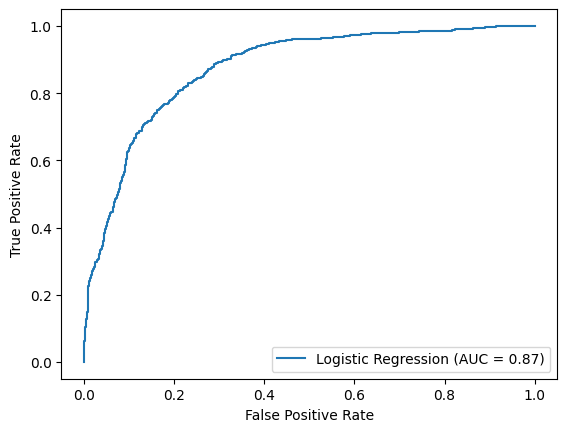

In [129]:
# Let's look at the ROC curve and AUC score now

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

fpr_log_reg_bal, tpr_log_reg_bal, thresholds_log_reg_bal = roc_curve(y_true=employees_labels_bal, y_score=y_scores_bal)

roc_auc_log_reg_bal = roc_auc_score(y_true=employees_labels_bal, y_score=y_scores_bal)

display_roc_log_reg_bal = RocCurveDisplay(fpr=fpr_log_reg_bal, 
                                      tpr=tpr_log_reg_bal, 
                                      roc_auc=roc_auc_log_reg_bal, 
                                      estimator_name='Logistic Regression')

display_roc_log_reg_bal.plot()
plt.show()

In [130]:
# Now the AUC is 88% which is improved by 6%

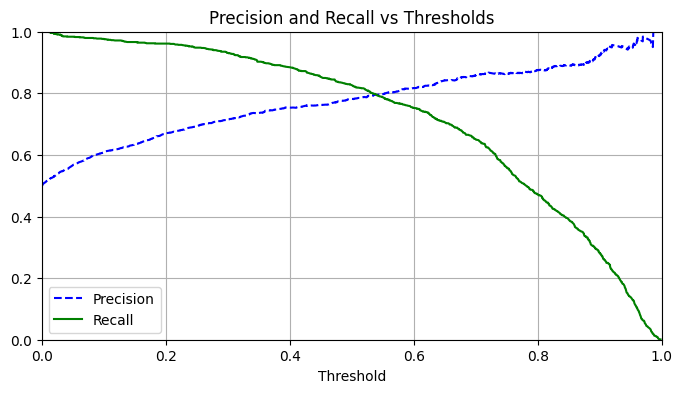

In [131]:
# Let's look at the precision recall vs thresholds curve

precisions_bal, recalls_bal, thresholds_bal = precision_recall_curve(y_true=employees_labels_bal, probas_pred=y_scores_bal)

plt.figure(figsize=(8,4))
plot_precision_recall_vs_thresholds(precisions_bal, recalls_bal, thresholds_bal)
plt.show()

In [132]:
# Hyperparameter tuning Logistic Regression model

from sklearn.model_selection import GridSearchCV, StratifiedKFold

model = LogisticRegression(random_state=42)

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l2']
}

skf = StratifiedKFold(n_splits=5)

log_reg_cv_bal = GridSearchCV(estimator=model, 
                              param_grid=param_grid, 
                              cv=skf, 
                              scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
                              refit='recall',
                              verbose=True,
                              n_jobs=-1)

log_reg_cv_bal.fit(employees_prepared_bal, employees_labels_bal)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='recall',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
             verbose=True)

In [133]:
log_reg_cv_bal.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [134]:
log_reg_cv_bal.best_score_

0.8245705788852998

In [135]:
pd.DataFrame(log_reg_cv_bal.cv_results_)[['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc']]

,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_roc_auc
0,0.792608,0.778372,0.818484,0.873587
1,0.792607,0.777880,0.819500,0.873695
2,0.792608,0.778372,0.818484,0.873587
3,0.791592,0.778068,0.816459,0.873474
4,0.792606,0.779533,0.816459,0.873655
5,0.792098,0.778317,0.817474,0.873695
6,0.792604,0.778518,0.818484,0.873716
7,0.792098,0.778317,0.817474,0.873690
8,0.792606,0.779533,0.816459,0.873660
9,0.793619,0.779942,0.818484,0.873871


 With this it is clearly evident that after balancing the classes the overall performance of the model is very much
 improved in terms of Precision, Recall and AUC

 The maximum number that can be obtained from logistic regression model after balancing the classes are:
 - Accuracy: 79%
 - Precision: 78% at 82% Recall
 - Recall: 82% at 78% Precision
 - ROC AUC: 88%

In [136]:
# Common function to evaluate the models
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    if hasattr(model, 'predict_proba'):
        y_train_scores = model.predict_proba(X_train)[:, 1]
        y_test_scores = model.predict_proba(X_test)[:, 1]
    
        print('Preformance on Train set:\n')
        print(f'Confusion Matrix:\n {confusion_matrix(y_train, y_train_pred)}')
        print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
        print(f'Precision: {precision_score(y_train, y_train_pred)}')
        print(f'Recall: {recall_score(y_train, y_train_pred)}')
        print(f'F1 Score: {f1_score(y_train, y_train_pred)}')
        print(f'ROC AUC score: {roc_auc_score(y_train, y_train_scores)}')

        print()
        print('-'*50)
        print()

        print('Preformance on Test set:\n')
        print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_test_pred)}')
        print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
        print(f'Precision: {precision_score(y_test, y_test_pred)}')
        print(f'Recall: {recall_score(y_test, y_test_pred)}')
        print(f'F1 Score: {f1_score(y_test, y_test_pred)}')
        print(f'ROC AUC score: {roc_auc_score(y_test, y_test_scores)}')
    
    else:
        print('Preformance on Train set:\n')
        print(f'Confusion Matrix:\n {confusion_matrix(y_train, y_train_pred)}')
        print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
        print(f'Precision: {precision_score(y_train, y_train_pred)}')
        print(f'Recall: {recall_score(y_train, y_train_pred)}')
        print(f'F1 Score: {f1_score(y_train, y_train_pred)}')

        print()
        print('-'*50)
        print()

        print('Preformance on Test set:\n')
        print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_test_pred)}')
        print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
        print(f'Precision: {precision_score(y_test, y_test_pred)}')
        print(f'Recall: {recall_score(y_test, y_test_pred)}')
        print(f'F1 Score: {f1_score(y_test, y_test_pred)}')
        

In [137]:
def evaluate_model_with_threshold(model, X_train, y_train, X_test, y_test, threshold):
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    y_train_pred = (y_train_pred_proba > threshold)
    y_test_pred = (y_test_pred_proba > threshold)
    
    print('Preformance on Train set:\n')
    print(f'Confusion Matrix:\n {confusion_matrix(y_train, y_train_pred)}')
    print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
    print(f'Precision: {precision_score(y_train, y_train_pred)}')
    print(f'Recall: {recall_score(y_train, y_train_pred)}')
    print(f'F1 Score: {f1_score(y_train, y_train_pred)}')
    print(f'ROC AUC score: {roc_auc_score(y_train, y_train_pred_proba)}')
    
    print()
    print('-'*50)
    print()
    
    print('Preformance on Test set:\n')
    print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_test_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
    print(f'Precision: {precision_score(y_test, y_test_pred)}')
    print(f'Recall: {recall_score(y_test, y_test_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_test_pred)}')
    print(f'ROC AUC score: {roc_auc_score(y_test, y_test_pred_proba)}')

In [138]:
# Evaluating the above Logistic Regression model which is trained on the balanced dataset

evaluate_model(model=log_reg_cv_bal.best_estimator_, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[775 211]
 [171 815]]
Accuracy: 0.8062880324543611
Precision: 0.7943469785575049
Recall: 0.8265720081135902
F1 Score: 0.8101391650099403
ROC AUC score: 0.8892383840295578

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[207  40]
 [ 12  35]]
Accuracy: 0.8231292517006803
Precision: 0.4666666666666667
Recall: 0.7446808510638298
F1 Score: 0.5737704918032787
ROC AUC score: 0.8514945301059522


The performance on the test set in terms of accuracy looks good but the precision and recall does not look as great as it did on the training set.

## 

In [139]:
# We should now try some other advanced models

### 2a. SVM - Linear SVC

In [140]:
# Now, Let's first train the Linear SVC

from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, loss='hinge', random_state=42)

In [141]:
cross_val_score(estimator=svm_clf, X=employees_prepared_bal, y=employees_labels_bal, cv=4, scoring='accuracy')

array([0.78498986, 0.80527383, 0.8336714 , 0.79716024])

In [142]:
# All the accuracies are atleast above 75% and the best is around 84%

In [143]:
# Training

svm_clf.fit(employees_prepared_bal, employees_labels_bal)

LinearSVC(C=1, loss='hinge', random_state=42)

In [144]:
evaluate_model(model=svm_clf, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[771 215]
 [140 846]]
Accuracy: 0.8199797160243407
Precision: 0.7973609802073516
Recall: 0.8580121703853956
F1 Score: 0.8265754763067905

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[202  45]
 [ 11  36]]
Accuracy: 0.8095238095238095
Precision: 0.4444444444444444
Recall: 0.7659574468085106
F1 Score: 0.5625


In [145]:
# Let's try hyperparameter tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold

model_svm_lsvc = LinearSVC(random_state=42)

param_grid = {
    'loss': ['hinge', 'squared_hinge'],
    'C': [100, 10, 1.0, 0.1, 0.01],
}

rskf = RepeatedStratifiedKFold(n_splits=4)

svm_clf_cv = GridSearchCV(estimator=model_svm_lsvc, 
                          param_grid=param_grid, 
                          cv=rskf, 
                          scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
                          refit='accuracy',
                          verbose=True,
                          n_jobs=-1)

svm_clf_cv.fit(employees_prepared_bal, employees_labels_bal)

Fitting 40 folds for each of 10 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=4, random_state=None),
             estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'loss': ['hinge', 'squared_hinge']},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
             verbose=True)

In [146]:
pd.DataFrame(svm_clf_cv.cv_results_)[['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc']]

,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_roc_auc
0,0.707454,0.712886,0.704869,0.783254
1,0.708469,0.719133,0.705702,0.792388
2,0.802890,0.782574,0.839656,0.873541
3,0.793864,0.775514,0.828181,0.870322
4,0.804970,0.785782,0.839351,0.874884
5,0.792850,0.775625,0.824749,0.874166
6,0.803955,0.784930,0.837937,0.875922
7,0.792596,0.775383,0.824546,0.874800
8,0.793103,0.775267,0.826072,0.870202
9,0.793712,0.777601,0.823228,0.875766


In [147]:
# With LinearSVC the maximum accuracy that can be obtained is 80% with 83% Recall at 78% Precision and 88% AUC

## 

### 2b. SVM - Polynomial Kernel

In [148]:
# Now, Let's try SVC with polynomial kernel

from sklearn.svm import SVC

svm_clf_poly = SVC(kernel='poly', degree=3, coef0=1, C=5, random_state=42)

In [149]:
cross_val_score(estimator=svm_clf_poly, X=employees_prepared_bal, y=employees_labels_bal, cv=4, scoring='accuracy')

array([0.92494929, 0.93306288, 0.92697769, 0.92089249])

In [150]:
# Wow! With this model the accuracy is atleast above 92%

In [151]:
# Training

svm_clf_poly.fit(employees_prepared_bal, employees_labels_bal)

SVC(C=5, coef0=1, kernel='poly', random_state=42)

In [152]:
evaluate_model(model=svm_clf_poly, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[985   1]
 [  0 986]]
Accuracy: 0.9994929006085193
Precision: 0.9989868287740629
Recall: 1.0
F1 Score: 0.9994931576279777

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[228  19]
 [ 25  22]]
Accuracy: 0.8503401360544217
Precision: 0.5365853658536586
Recall: 0.46808510638297873
F1 Score: 0.5


In [153]:
# The model is overfitting. Precision and Recall are very low on test set and there is also a large difference b/w
# train accuracy and test accuracy

In [154]:
# Let's try hyperparameter tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold

model_svc_poly = SVC(random_state=42)

param_grid = {
    'C': [10, 1, 0.1, 0.01, 0.001],
    'kernel': ['poly'],
    'degree': [1, 2, 3],
    'coef0': [0, 0.3, 0.5, 0.7, 1],
}

skf = StratifiedKFold(n_splits=4)

svc_poly_cv = GridSearchCV(estimator=model_svc_poly, 
                            param_grid=param_grid, 
                            cv=skf, 
                            scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
                            refit='accuracy',
                            verbose=2,
                            n_jobs=-1)

svc_poly_cv.fit(employees_prepared_bal, employees_labels_bal)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [10, 1, 0.1, 0.01, 0.001],
                         'coef0': [0, 0.3, 0.5, 0.7, 1], 'degree': [1, 2, 3],
                         'kernel': ['poly']},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc'], verbose=2)

In [155]:
svc_poly_cv.best_params_

{'C': 10, 'coef0': 0, 'degree': 3, 'kernel': 'poly'}

In [156]:
svc_poly_cv.best_score_

0.9406693711967545

In [292]:
pd.DataFrame(svc_poly_cv.cv_results_)[['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc']].sort_values(by='mean_test_accuracy', ascending=False).head()

,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_roc_auc
2,0.940669,0.899772,0.991874,0.980049
17,0.935598,0.904097,0.974614,0.976535
5,0.932556,0.888351,0.989837,0.980020
8,0.928499,0.881880,0.989837,0.976840
11,0.926978,0.879454,0.989837,0.974544


In [158]:
# Let's evaluate this model and look at it's performance

evaluate_model(model=svc_poly_cv.best_estimator_, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[986   0]
 [  0 986]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[228  19]
 [ 26  21]]
Accuracy: 0.8469387755102041
Precision: 0.525
Recall: 0.44680851063829785
F1 Score: 0.48275862068965514


In [159]:
# Even after hyperparameter tuning, the model is highly overfitting and the precision and recall are very low on test set

In [160]:
svm_clf_poly_trial = SVC(kernel='poly', degree=3, coef0=1, C=0.5)

svm_clf_poly_trial.fit(employees_prepared_bal, employees_labels_bal)

evaluate_model(model=svm_clf_poly_trial, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[946  40]
 [  6 980]]
Accuracy: 0.9766734279918864
Precision: 0.9607843137254902
Recall: 0.9939148073022313
F1 Score: 0.9770687936191427

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[226  21]
 [ 22  25]]
Accuracy: 0.8537414965986394
Precision: 0.5434782608695652
Recall: 0.5319148936170213
F1 Score: 0.5376344086021505


## 

### 2c. SVM - Gaussian RBF Kernel

In [161]:
from sklearn.svm import SVC

svm_clf_rbf = SVC(kernel='rbf', probability=True, random_state=42)

In [162]:
cross_val_score(estimator=svm_clf_rbf, X=employees_prepared_bal, y=employees_labels_bal, cv=4, scoring='accuracy')

array([0.89655172, 0.9188641 , 0.93509128, 0.90263692])

In [163]:
# Training

svm_clf_rbf.fit(employees_prepared_bal, employees_labels_bal)

SVC(probability=True, random_state=42)

In [164]:
evaluate_model(model=svm_clf_rbf, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[943  43]
 [ 17 969]]
Accuracy: 0.9695740365111561
Precision: 0.9575098814229249
Recall: 0.9827586206896551
F1 Score: 0.96996996996997
ROC AUC score: 0.9955996527449197

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[235  12]
 [ 23  24]]
Accuracy: 0.8809523809523809
Precision: 0.6666666666666666
Recall: 0.5106382978723404
F1 Score: 0.5783132530120482
ROC AUC score: 0.807390817469205


In [165]:
# Even the RBF kernel is not giving great results in terms of test precision and recall

In [166]:
y_scores_svm_rbf = svm_clf_rbf.predict_proba(employees_prepared_bal)[:, 1]

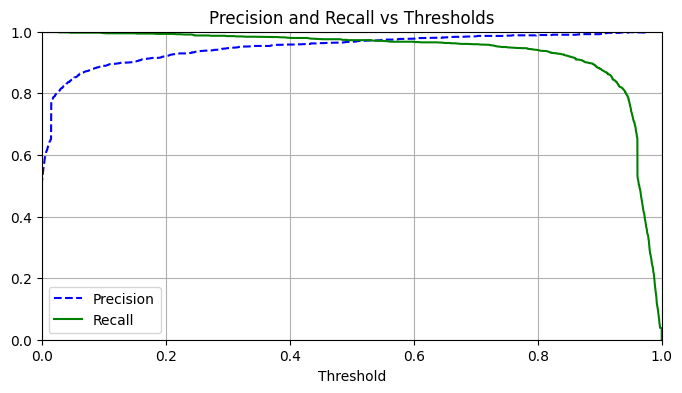

In [167]:
# Let's look at the precision recall vs thresholds curve to see if we can improve the f1 score

precisions_svm_rbf, recalls_svm_rbf, thresholds_svm_rbf = precision_recall_curve(y_true=employees_labels_bal, probas_pred=y_scores_svm_rbf)

plt.figure(figsize=(8,4))
plot_precision_recall_vs_thresholds(precisions_svm_rbf, recalls_svm_rbf, thresholds_svm_rbf)
plt.show()

In [168]:
y_scores_svm_rbf

array([0.00925498, 0.01506478, 0.01839208, ..., 0.96080339, 0.96079215,
       0.99998828])

In [169]:
# Setting the threshold to 0.6

threshold_svm_rbf = 0.6

y_train_pred_svm_rbf = (y_scores_svm_rbf > threshold_svm_rbf)

y_train_pred_svm_rbf

array([False, False, False, ...,  True,  True,  True])

In [170]:
# Let's evaluate the performance after changing the threshold

evaluate_model_with_threshold(model=svm_clf_rbf, 
                              X_train=employees_prepared_bal, 
                              y_train=employees_labels_bal, 
                              X_test=employees_test_prepared, 
                              y_test=employees_test_labels,
                              threshold=0.6)

Preformance on Train set:

Confusion Matrix:
 [[964  22]
 [ 32 954]]
Accuracy: 0.9726166328600405
Precision: 0.9774590163934426
Recall: 0.9675456389452333
F1 Score: 0.9724770642201835
ROC AUC score: 0.9955996527449197

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[242   5]
 [ 28  19]]
Accuracy: 0.8877551020408163
Precision: 0.7916666666666666
Recall: 0.40425531914893614
F1 Score: 0.5352112676056338
ROC AUC score: 0.807390817469205


### CHECKPOINT

In [171]:
# Even after changing the threshold, Accuracy and Precision has improved but still the Recall is very low.

## 

In [172]:
# Now we have to try some other models

In [173]:
# Getting the feature names from the pipeline

full_pipeline[:-1].get_feature_names_out()

array(['scaling__Age', 'scaling__DailyRate', 'scaling__DistanceFromHome',
       'scaling__Education', 'scaling__EnvironmentSatisfaction',
       'scaling__HourlyRate', 'scaling__JobInvolvement',
       'scaling__JobLevel', 'scaling__JobSatisfaction',
       'scaling__MonthlyIncome', 'scaling__MonthlyRate',
       'scaling__NumCompaniesWorked', 'scaling__PercentSalaryHike',
       'scaling__PerformanceRating', 'scaling__RelationshipSatisfaction',
       'scaling__StockOptionLevel', 'scaling__TotalWorkingYears',
       'scaling__TrainingTimesLastYear', 'scaling__WorkLifeBalance',
       'scaling__YearsAtCompany', 'scaling__YearsInCurrentRole',
       'scaling__YearsSinceLastPromotion',
       'scaling__YearsWithCurrManager',
       'one_hot_encoding__BusinessTravel_Non-Travel',
       'one_hot_encoding__BusinessTravel_Travel_Frequently',
       'one_hot_encoding__BusinessTravel_Travel_Rarely',
       'one_hot_encoding__Department_Human Resources',
       'one_hot_encoding__Department_Re

### 3. Decision Tree

In [174]:
# Now let's train the decision tree classifier and see how it performs

from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [175]:
cross_val_score(estimator=dtree_clf, X=employees_prepared_bal, y=employees_labels_bal, cv=4, scoring='accuracy')

array([0.72819473, 0.87018256, 0.86612576, 0.84178499])

In [176]:
# With max_depth=5 we are able to get atleast more than 8% accuracy but in one case we are getting 74. Let's investigate this
# further

In [177]:
# Training

dtree_clf.fit(employees_prepared_bal, employees_labels_bal)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [178]:
# Let's evaluate this model

evaluate_model(model=dtree_clf, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[861 125]
 [158 828]]
Accuracy: 0.8564908722109533
Precision: 0.8688352570828961
Recall: 0.8397565922920892
F1 Score: 0.8540484785972151
ROC AUC score: 0.9187128932848931

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[220  27]
 [ 24  23]]
Accuracy: 0.826530612244898
Precision: 0.46
Recall: 0.48936170212765956
F1 Score: 0.4742268041237113
ROC AUC score: 0.7466620725299337


In [179]:
# Performance on the test set is very low. Model is overfitting

In [180]:
# Let's try hyperparameter tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold

model_dtree_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 9, 11],
    'min_samples_split': [5, 10, 15, 20, 25],
    'min_samples_leaf': [5, 10, 15],
}

skf = StratifiedKFold(n_splits=5)

dtree_clf_cv = GridSearchCV(estimator=model_dtree_clf, 
                            param_grid=param_grid, 
                            cv=skf, 
                            scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
                            refit='accuracy',
                            verbose=2,
                            n_jobs=-1)

dtree_clf_cv.fit(employees_prepared_bal, employees_labels_bal)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc'], verbose=2)

In [181]:
dtree_clf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 25}

In [182]:
dtree_clf_cv.best_score_

0.8469151191929576

In [183]:
evaluate_model(model=dtree_clf_cv.best_estimator_, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[941  45]
 [125 861]]
Accuracy: 0.9137931034482759
Precision: 0.9503311258278145
Recall: 0.8732251521298174
F1 Score: 0.9101479915433404
ROC AUC score: 0.9788802875140403

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[236  11]
 [ 33  14]]
Accuracy: 0.8503401360544217
Precision: 0.56
Recall: 0.2978723404255319
F1 Score: 0.3888888888888889
ROC AUC score: 0.7024722198294426


In [184]:
def compute_and_plot_precision_recall_vs_thresholds(model, X_train, y_train):
    y_scores = model.predict_proba(X_train)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    plt.figure(figsize=(8,4))
    plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
    plt.show()

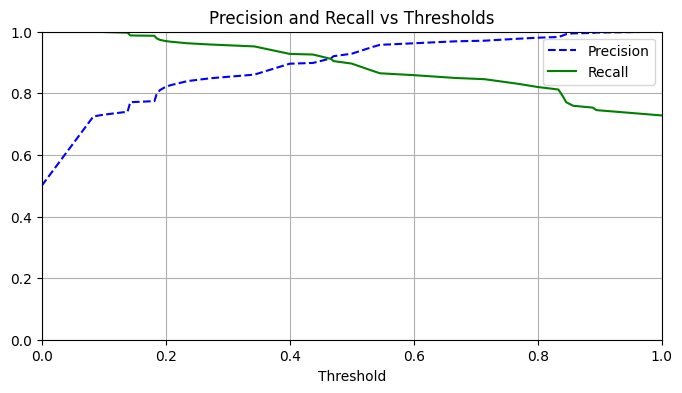

In [185]:
compute_and_plot_precision_recall_vs_thresholds(model=dtree_clf_cv.best_estimator_, 
                                                X_train=employees_prepared_bal, 
                                                y_train=employees_labels_bal)

In [186]:
evaluate_model_with_threshold(model=dtree_clf_cv.best_estimator_, 
                           X_train=employees_prepared_bal, 
                           y_train=employees_labels_bal, 
                           X_test=employees_test_prepared, 
                           y_test=employees_test_labels,
                           threshold=0.8)

Preformance on Train set:

Confusion Matrix:
 [[972  14]
 [185 801]]
Accuracy: 0.8990872210953347
Precision: 0.9828220858895705
Recall: 0.8123732251521298
F1 Score: 0.889505830094392
ROC AUC score: 0.9788802875140403

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[240   7]
 [ 37  10]]
Accuracy: 0.8503401360544217
Precision: 0.5882352941176471
Recall: 0.2127659574468085
F1 Score: 0.3125
ROC AUC score: 0.7024722198294426


In [187]:
# Even after adjusting various thresholds, the model is not performing well on the test set 

In [191]:
dtree_clf_cv.best_estimator_.feature_importances_

array([0.01727736, 0.        , 0.02684309, 0.00507594, 0.02193428,
       0.00942674, 0.02101808, 0.04309269, 0.07095931, 0.01913513,
       0.00193296, 0.02515821, 0.        , 0.        , 0.0111971 ,
       0.03191882, 0.        , 0.        , 0.01151651, 0.01840328,
       0.        , 0.00507583, 0.01102922, 0.        , 0.01389376,
       0.01116718, 0.        , 0.        , 0.00947996, 0.        ,
       0.        , 0.02622017, 0.        , 0.        , 0.00893323,
       0.        , 0.        , 0.        , 0.        , 0.06692233,
       0.        , 0.02344754, 0.        , 0.01805605, 0.        ,
       0.08262905, 0.        , 0.        , 0.07478628, 0.        ,
       0.2738125 , 0.0396574 ])

In [197]:
feature_names = full_pipeline[:-1].get_feature_names_out()

pd.Series(data=dtree_clf_cv.best_estimator_.feature_importances_[:-1], index=full_pipeline[:-1].get_feature_names_out()).sort_values(ascending=False)

one_hot_encoding__OverTime_Yes                         0.273813
one_hot_encoding__JobRole_Sales Representative         0.082629
one_hot_encoding__MaritalStatus_Single                 0.074786
scaling__JobSatisfaction                               0.070959
one_hot_encoding__JobRole_Laboratory Technician        0.066922
scaling__JobLevel                                      0.043093
scaling__StockOptionLevel                              0.031919
scaling__DistanceFromHome                              0.026843
one_hot_encoding__EducationField_Marketing             0.026220
scaling__NumCompaniesWorked                            0.025158
one_hot_encoding__JobRole_Manufacturing Director       0.023448
scaling__EnvironmentSatisfaction                       0.021934
scaling__JobInvolvement                                0.021018
scaling__MonthlyIncome                                 0.019135
scaling__YearsAtCompany                                0.018403
one_hot_encoding__JobRole_Research Scien

In [ ]:
# According to decision tree classifier OverTime is a very important feature for attrition

In [ ]:
# Let's move further and try some other models

## 

### 4a. Ensemble - Voting Classifier 

In [279]:
# Lets now try the voting classifer which is an ensemle technique
# Let's combine Logistic Regression, SVM and Random Forest classifiers into one ensemble

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_reg_clf_ens = LogisticRegression()
svm_clf_rbf_ens = SVC(kernel='rbf', probability=True)
svm_clf_poly_ens = SVC(kernel='poly', degree=3, coef0=1, C=0.5, probability=True)
rf_clf_ens = RandomForestClassifier()

voting_clf = VotingClassifier(estimators=[('log_reg', log_reg_clf_ens), 
                                          ('rf', rf_clf_ens), 
                                          ('svc_rbf', svm_clf_rbf_ens),
                                          ('svc_poly', svm_clf_poly_ens)], 
                              voting='soft')

In [280]:
cross_val_score(estimator=voting_clf, X=employees_prepared_bal, y=employees_labels_bal, cv=4, scoring='accuracy')

array([0.89858012, 0.94523327, 0.93914807, 0.93103448])

In [281]:
voting_clf.fit(employees_prepared_bal, employees_labels_bal)

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc_rbf', SVC(probability=True)),
                             ('svc_poly',
                              SVC(C=0.5, coef0=1, kernel='poly',
                                  probability=True))],
                 voting='soft')

In [282]:
evaluate_model(model=voting_clf, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[959  27]
 [ 13 973]]
Accuracy: 0.9797160243407708
Precision: 0.973
Recall: 0.986815415821501
F1 Score: 0.9798590130916414
ROC AUC score: 0.9986936790523722

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[241   6]
 [ 22  25]]
Accuracy: 0.9047619047619048
Precision: 0.8064516129032258
Recall: 0.5319148936170213
F1 Score: 0.641025641025641
ROC AUC score: 0.8392626410543544


In [340]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5)

voting_clf_cv = cross_validate(estimator=voting_clf, 
                               X=employees_prepared_bal, 
                               y=employees_labels_bal, 
                               cv=skf, 
                               scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

pd.DataFrame(voting_clf_cv)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,1.439152,0.149853,0.881013,0.898936,0.857868,0.877922,0.940676
1,1.448062,0.158576,0.956962,0.950249,0.964646,0.957393,0.990335
2,1.423969,0.154634,0.936548,0.913462,0.964467,0.938272,0.991265
3,1.487030,0.153925,0.941624,0.910377,0.979695,0.943765,0.992064
4,1.458419,0.157579,0.934010,0.909091,0.964467,0.935961,0.984591


### CHECKPOINT

## 

### 4b. Ensemble - Bagging Classifier

In [311]:
# Let's now try the Bagging Classifier with SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

bag_clf = BaggingClassifier(base_estimator=SVC(kernel='rbf', probability=True), n_estimators=100, oob_score=True)

In [312]:
cross_val_score(estimator=bag_clf, X=employees_prepared_bal, y=employees_labels_bal, cv=4, scoring='accuracy')

array([0.89046653, 0.93306288, 0.93306288, 0.91075051])

In [313]:
bag_clf.fit(employees_prepared_bal, employees_labels_bal)

BaggingClassifier(base_estimator=SVC(probability=True), n_estimators=100,
                  oob_score=True)

In [314]:
evaluate_model(model=bag_clf, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[955  31]
 [ 22 964]]
Accuracy: 0.9731237322515213
Precision: 0.9688442211055276
Recall: 0.9776876267748479
F1 Score: 0.9732458354366481
ROC AUC score: 0.9967002538582755

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[238   9]
 [ 24  23]]
Accuracy: 0.8877551020408163
Precision: 0.71875
Recall: 0.48936170212765956
F1 Score: 0.5822784810126582
ROC AUC score: 0.8055818761305884


In [315]:
bag_clf.oob_score_

0.9320486815415822

## 

### 4c. Ensemble - Random Forest

In [320]:
# Now let's try with the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)

In [321]:
cross_val_score(estimator=rf_clf, X=employees_prepared_bal, y=employees_labels_bal, cv=4, scoring='accuracy')

array([0.76470588, 0.89249493, 0.88438134, 0.86612576])

In [322]:
rf_clf.fit(employees_prepared_bal, employees_labels_bal)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)

In [323]:
evaluate_model(model=rf_clf, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[890  96]
 [163 823]]
Accuracy: 0.8686612576064908
Precision: 0.8955386289445049
Recall: 0.834685598377282
F1 Score: 0.8640419947506561
ROC AUC score: 0.9358082115129048

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[222  25]
 [ 21  26]]
Accuracy: 0.8435374149659864
Precision: 0.5098039215686274
Recall: 0.5531914893617021
F1 Score: 0.5306122448979591
ROC AUC score: 0.8167800844172625


In [327]:
# Let's try hyperparameter tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold

model_rf_clf = RandomForestClassifier(oob_score=True, random_state=42)

param_grid = {
    'n_estimators': [200, 300, 500, 700],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2', None]
}

skf = StratifiedKFold(n_splits=5)

rf_clf_cv = GridSearchCV(estimator=model_rf_clf, 
                         param_grid=param_grid, 
                         scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], 
                         refit='accuracy', 
                         cv=skf, 
                         verbose=1, 
                         n_jobs=-1)

rf_clf_cv.fit(employees_prepared_bal, employees_labels_bal)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [200, 300, 500, 700]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [328]:
rf_clf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [329]:
rf_clf_cv.best_score_

0.9199524513268651

In [332]:
rf_clf_cv.best_estimator_.oob_score_

0.9249492900608519

In [330]:
pd.DataFrame(rf_clf_cv.cv_results_)[['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 
                                     'mean_test_roc_auc']].sort_values(by='mean_test_accuracy', ascending=False).head()

,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_roc_auc
612,0.919952,0.953958,0.879198,0.900030,0.976003
616,0.919952,0.953958,0.879198,0.900030,0.976003
613,0.918432,0.954593,0.876152,0.897085,0.976055
617,0.918432,0.954593,0.876152,0.897085,0.976055
618,0.917925,0.951846,0.877168,0.897170,0.976234


In [331]:
evaluate_model(model=rf_clf_cv, 
               X_train=employees_prepared_bal, 
               y_train=employees_labels_bal, 
               X_test=employees_test_prepared, 
               y_test=employees_test_labels)

Preformance on Train set:

Confusion Matrix:
 [[979   7]
 [ 39 947]]
Accuracy: 0.9766734279918864
Precision: 0.9926624737945493
Recall: 0.960446247464503
F1 Score: 0.9762886597938144
ROC AUC score: 0.9992120930347378

--------------------------------------------------

Preformance on Test set:

Confusion Matrix:
 [[243   4]
 [ 31  16]]
Accuracy: 0.8809523809523809
Precision: 0.8
Recall: 0.3404255319148936
F1 Score: 0.47761194029850745
ROC AUC score: 0.8079937979154104


In [333]:
feature_names = full_pipeline[:-1].get_feature_names_out()

pd.Series(data=rf_clf_cv.best_estimator_.feature_importances_[:-1], index=full_pipeline[:-1].get_feature_names_out()).sort_values(ascending=False)

one_hot_encoding__OverTime_No                          0.102365
one_hot_encoding__OverTime_Yes                         0.097657
scaling__StockOptionLevel                              0.061468
one_hot_encoding__MaritalStatus_Single                 0.055210
scaling__JobSatisfaction                               0.050912
scaling__JobLevel                                      0.036967
scaling__DistanceFromHome                              0.032816
one_hot_encoding__BusinessTravel_Travel_Frequently     0.030276
scaling__Age                                           0.029800
scaling__EnvironmentSatisfaction                       0.028716
scaling__DailyRate                                     0.026472
scaling__MonthlyIncome                                 0.025214
one_hot_encoding__EducationField_Life Sciences         0.023865
scaling__YearsAtCompany                                0.021764
scaling__NumCompaniesWorked                            0.021108
scaling__YearsInCurrentRole             